In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import json
import joblib
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split, cross_validate,StratifiedKFold
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
#from sklearn.pipeline import Pipel
import pandas as pd
import numpy as np
import ast
import string
import nltk
import matplotlib.pyplot as plt
#nltk.download('wordnet')
import seaborn as sns
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/prot')  

In [ ]:
with open("input.json") as fp:
  input=json.load(fp)
with open("output.json") as fp:
  output=json.load(fp)

In [ ]:
with open("row_label.json") as fp:
  row_labels=json.load(fp)

In [ ]:
input[:20]

In [ ]:
temp=[]
op=[]
for n,i in enumerate(input):
  if n!=156:
    temp.append(np.sum(np.array(i),axis=0))
    #temp.append(np.sum(np.array(i),axis=0).reshape((100,1)))
    #temp.append((np.array(i)))
    #print(i)
    #print(temp)
    op.append(output[n])
inp=np.array(temp)
output=np.array(op)#.reshape((558,1))

In [ ]:
print(np.sum(output==0))
print(np.sum(output==1))

156
395


In [ ]:
inp.reshape((558,100,1))
output.reshape((558,1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
inp=np.asarray(inp)
output=np.asarray(output)
X_train, X_test, y_train, y_test = train_test_split(inp, output, test_size=0.35,random_state=0)

f1 0.7441414502239743
precision 0.8324174854166962
accuracy 0.813116883116883
roc_auc 0.8428493589743591
[[ 28  25]
 [ 11 129]]
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        53
           1       0.84      0.92      0.88       140

    accuracy                           0.81       193
   macro avg       0.78      0.72      0.74       193
weighted avg       0.80      0.81      0.80       193



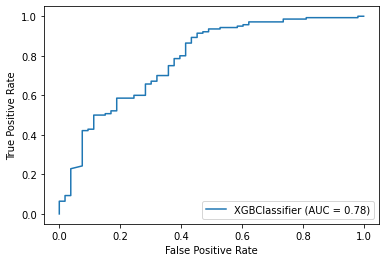

In [ ]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
print("f1",np.mean(cross_val_score(model, inp, output,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, inp, output,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, inp, output,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, inp, output,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()  

In [ ]:
_ = joblib.dump(model, "xgb_w2v.pkl", compress=9)

In [ ]:
from xgboost import cv
import xgboost as xgb
params = {"objective":"binary:logistic",'colsample_bytree': 1,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 0}
data_dmatrix = xgb.DMatrix(data=inp,label=output)
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=10,stratified=True,
                    num_boost_round=500, metrics={"map","auc","error"}, seed=0)

In [ ]:
xgb_cv.tail()

,train-auc-mean,train-auc-std,train-error-mean,train-error-std,train-map-mean,train-map-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std,test-map-mean,test-map-std
495,0.997328,0.000425,0.026369,0.002619,0.998936,0.000173,0.828524,0.051180,0.188442,0.043281,0.909762,0.034335
496,0.997328,0.000425,0.026369,0.002619,0.998918,0.000181,0.828691,0.051198,0.188442,0.043281,0.909797,0.034356
497,0.997328,0.000425,0.026369,0.002619,0.998933,0.000168,0.828047,0.051118,0.190260,0.040180,0.909333,0.034381
498,0.997328,0.000425,0.026369,0.002619,0.998919,0.000192,0.827893,0.051242,0.190260,0.040180,0.909241,0.034641
499,0.997328,0.000425,0.026369,0.002619,0.998953,0.000163,0.828534,0.051630,0.193896,0.042477,0.909535,0.034538


f1 0.727575401177076
precision 0.8299035958739035
accuracy 0.795
roc_auc 0.7693697916666667
[[ 29  24]
 [ 14 126]]
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        53
           1       0.84      0.90      0.87       140

    accuracy                           0.80       193
   macro avg       0.76      0.72      0.74       193
weighted avg       0.79      0.80      0.80       193



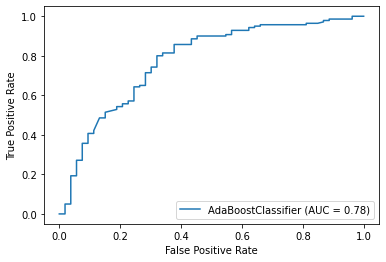

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# evaluate the model
print("f1",np.mean(cross_val_score(model, inp, output,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(model, inp, output,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(model, inp, output,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(model, inp, output,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
metrics.plot_roc_curve(model, X_test, y_test)  # doctest: +SKIP
plt.show()  

In [ ]:
_ = joblib.dump(model, "adaboost_w2v.pkl", compress=9)

In [ ]:
output.shape

(558, 1)

f1 0.7022629368545382
precision 0.8118713707268462
accuracy 0.789512987012987
roc_auc 0.8200993589743589
[[ 23  30]
 [ 10 130]]
              precision    recall  f1-score   support

           0       0.70      0.43      0.53        53
           1       0.81      0.93      0.87       140

    accuracy                           0.79       193
   macro avg       0.75      0.68      0.70       193
weighted avg       0.78      0.79      0.78       193



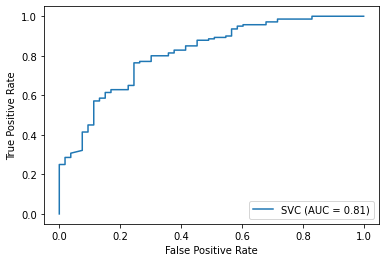

0.681266846361186

In [ ]:
from sklearn import svm
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
#Create a svm Classifier
clf = svm.SVC()# Linear Kernel

#Train the model using the training sets
print("f1",np.mean(cross_val_score(clf, inp, output,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(clf, inp, output,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(clf, inp, output,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(clf, inp, output,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  
roc_auc_score(y_test, y_pred)  

In [ ]:
_ = joblib.dump(clf, "svm_w2v.pkl", compress=9)

{'C': 5, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[ 24  28]
 [  9 133]]
              precision    recall  f1-score   support

           0       0.73      0.46      0.56        52
           1       0.83      0.94      0.88       142

    accuracy                           0.81       194
   macro avg       0.78      0.70      0.72       194
weighted avg       0.80      0.81      0.79       194



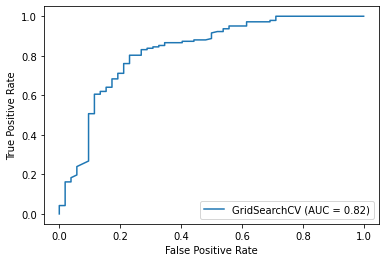

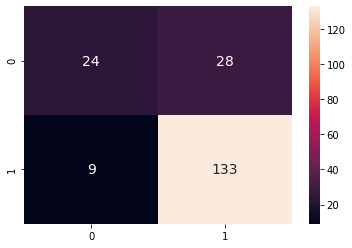

0.6990790899241603

In [ ]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.01,0.001,0.1, 1,5, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,10,20,"scale"], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 0,scoring="f1",cv=10) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(grid, X_test, y_test)  # doctest: +SKIP
plt.savefig("svm_grid.png")
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("svm_heat.png")

plt.show()
roc_auc_score(y_test, y_pred)  

f1 0.7255430489352144
precision 0.8191493039597185
accuracy 0.7985714285714285
roc_auc 0.8395889423076923
[[ 22  31]
 [  9 131]]
              precision    recall  f1-score   support

           0       0.71      0.42      0.52        53
           1       0.81      0.94      0.87       140

    accuracy                           0.79       193
   macro avg       0.76      0.68      0.70       193
weighted avg       0.78      0.79      0.77       193



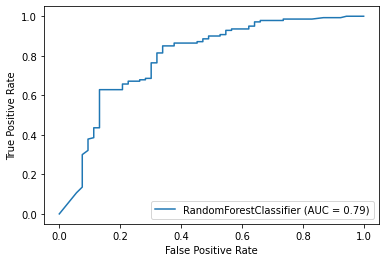

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
#print(X_test
print("f1",np.mean(cross_val_score(forest, inp, output,scoring="f1_macro",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("precision",np.mean(cross_val_score(forest, inp, output,scoring="precision",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("accuracy",np.mean(cross_val_score(forest, inp, output,scoring="accuracy",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
print("roc_auc",np.mean(cross_val_score(forest, inp, output,scoring="roc_auc",cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=0))))
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(forest, X_test, y_test)  # doctest: +SKIP
plt.show() 

In [ ]:
_ = joblib.dump(forest, "rf_w2v.pkl", compress=9)

{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[ 23  29]
 [ 17 125]]
              precision    recall  f1-score   support

           0       0.57      0.44      0.50        52
           1       0.81      0.88      0.84       142

    accuracy                           0.76       194
   macro avg       0.69      0.66      0.67       194
weighted avg       0.75      0.76      0.75       194



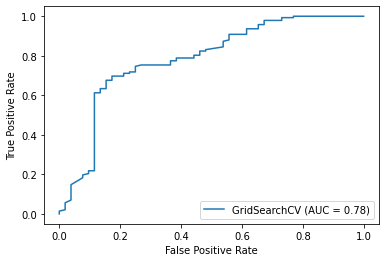

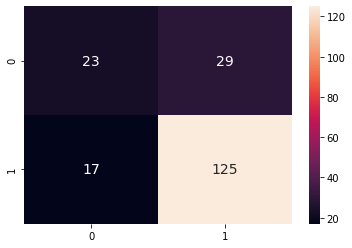

0.6612946912242686

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = [
{'n_estimators': [10, 25,50], 'max_features': [5, 10,15,20,100], 
 'max_depth': [10,None], 'bootstrap': [True, False]}
]
forest = RandomForestClassifier()
h_forest = GridSearchCV(forest, param_grid, cv=10, scoring='f1',verbose=0)
h_forest.fit(X_train, y_train)

print(h_forest.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(h_forest.best_estimator_) 
y_pred = h_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(h_forest, X_test, y_test)  # doctest: +SKIP
plt.savefig("rf_grid.png")
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 14}, fmt='g')
plt.savefig("rf_heat.png")

plt.show()
roc_auc_score(y_test, y_pred) 

In [ ]:
inp.reshape((558,100))

array([[ 0.11448825, -0.06767737,  0.07417489, ...,  0.02459422,
         0.03619924,  0.01279044],
       [ 0.03131074, -0.0800982 , -0.0890515 , ..., -0.04288026,
        -0.03894006, -0.00636407],
       [ 0.11354048, -0.07318777,  0.07378678, ...,  0.00200416,
         0.05123808, -0.01472694],
       ...,
       [ 0.057279  ,  0.01416489,  0.01486477, ..., -0.02366633,
         0.06776406,  0.01028517],
       [-0.16485774,  0.09376617, -0.08762894, ..., -0.04578647,
        -0.04865688, -0.05080542],
       [ 0.057279  ,  0.01416489,  0.01486477, ..., -0.02366633,
         0.06776406,  0.01028517]])

In [ ]:
inp.shape

(558, 100, 1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 551 samples in 0.006s...
[t-SNE] Computed neighbors for 551 samples in 0.087s...
[t-SNE] Computed conditional probabilities for sample 551 / 551
[t-SNE] Mean sigma: 0.200379
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.269516
[t-SNE] KL divergence after 300 iterations: 0.775220


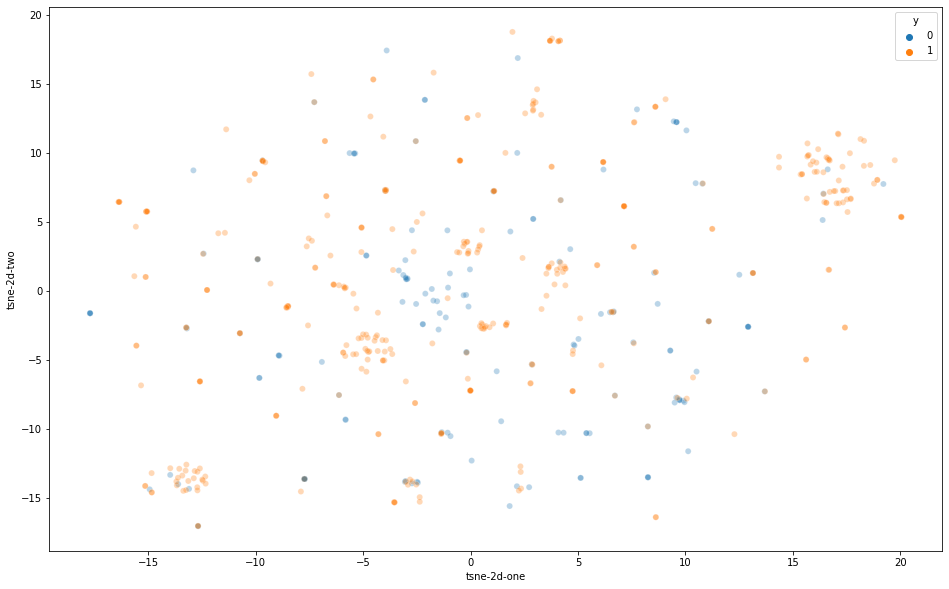

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE
d2=pd.DataFrame(data=inp)
#d2.insert(100, "100", output, True) 
#print(d2)
df_subset=pd.DataFrame()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(d2)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset["y"]=output
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    data=df_subset,
    legend="full",
    alpha=0.3
)
#plt.savefig("plot1.png")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
dfx = pd.DataFrame()
pca = PCA(n_components=3)

pca_result = pca.fit_transform(d2)
print(pca_result.shape)
dfx['pca-one'] = pca_result[:,0]
dfx['pca-two'] = pca_result[:,1] 
dfx['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

(552, 3)
Explained variation per principal component: [0.12844652 0.08090727 0.06018487]


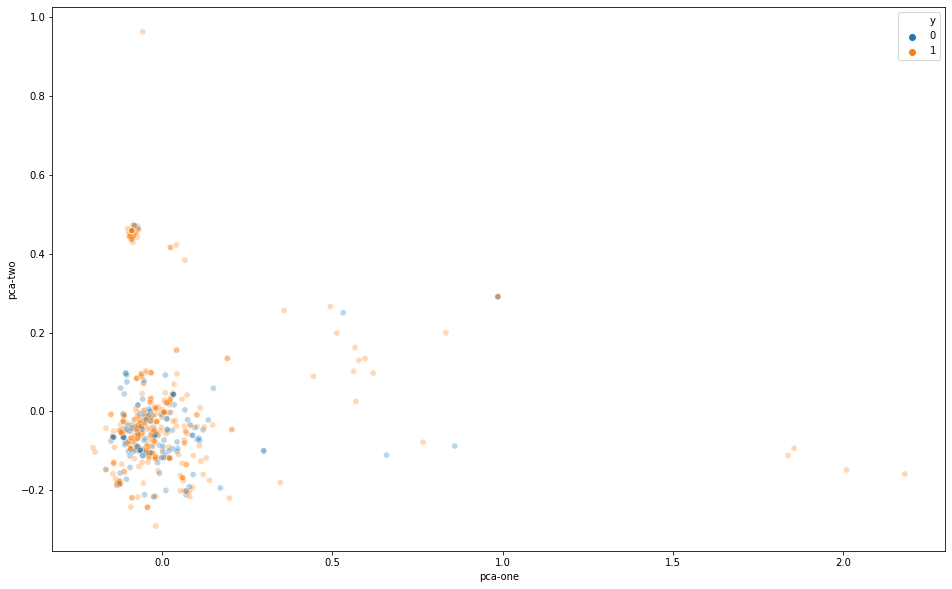

In [ ]:
np.random.seed(42)
rndperm = np.random.permutation(dfx.shape[0])
plt.figure(figsize=(16,10))
dfx["y"]=output
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue="y",
    data=dfx.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
#plt.savefig("plot2.png")

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dfx.loc[rndperm,:]["pca-one"], 
    ys=dfx.loc[rndperm,:]["pca-two"], 
    zs=dfx.loc[rndperm,:]["pca-three"]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
d2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1ERR,0.114488,-0.067677,0.074175,0.008188,-0.015419,0.035176,0.019838,0.021438,-0.021309,-0.004414,-0.011633,0.042724,-0.043248,0.043986,0.043440,0.005377,0.080785,-0.036527,0.017522,-0.029131,0.053889,0.063394,-0.010131,-0.025053,0.018540,0.009884,-0.032545,-0.054697,-0.016547,0.001511,-0.051861,0.045040,-0.009677,-0.007352,-0.037499,-0.050220,0.024081,-0.023015,0.048981,-0.026001,...,0.060211,-0.020724,-0.032858,0.035808,-0.027678,-0.081321,-0.064323,-0.081415,0.089226,0.016528,-0.021993,0.041144,-0.087281,-0.000648,-0.003453,-0.006864,0.053127,-0.024128,0.010631,-0.012285,0.006483,0.049565,0.066146,-0.006196,0.037061,-0.059050,0.132639,-0.024286,-0.006539,0.005639,-0.087751,-0.011105,-0.021300,-0.077248,0.093578,0.002187,0.024594,0.036199,0.012790,0
1FTL,0.031311,-0.080098,-0.089052,0.014268,0.064415,0.075148,-0.028559,0.031288,-0.001948,-0.010877,0.047970,-0.095987,0.017819,-0.053143,-0.049800,0.063240,0.037501,0.014960,-0.140583,-0.096620,-0.021676,-0.009074,0.010504,-0.016222,-0.008440,0.031167,0.025315,-0.055243,0.049544,0.037906,-0.002999,0.065024,-0.063577,-0.066291,-0.041878,-0.015602,-0.006686,-0.010404,-0.085886,-0.008884,...,0.017359,0.003396,-0.082489,0.094961,0.079555,0.011955,-0.063329,-0.037825,-0.013795,-0.006828,-0.050789,0.003951,-0.023788,0.011982,-0.011511,-0.000344,-0.038216,-0.021729,0.089686,0.036471,0.076457,0.018439,0.069402,-0.022761,-0.025327,-0.000189,-0.019926,0.060641,0.048020,0.059391,-0.003729,-0.059561,-0.024916,-0.001789,-0.083276,-0.023521,-0.042880,-0.038940,-0.006364,0
1LK2,0.046392,-0.001892,0.057446,-0.036598,0.038909,0.002165,0.062266,-0.007311,-0.033605,0.022630,0.010970,-0.046406,0.073361,-0.048945,-0.096388,-0.065353,0.054235,0.072471,0.007437,0.008918,-0.028573,0.035827,-0.018635,0.002286,-0.049865,-0.059017,0.002135,0.102353,-0.094404,0.017788,-0.038698,0.057676,-0.002578,0.104546,-0.041400,0.006325,-0.001717,0.035302,0.060713,0.023696,...,0.018517,-0.059261,0.093720,0.067387,0.108461,-0.046503,-0.038499,0.111403,-0.042911,0.040618,-0.032121,0.021260,0.052598,0.021980,0.025729,0.035554,-0.056716,0.021723,-0.005700,-0.005896,-0.023164,0.010455,0.086244,-0.014327,-0.018559,0.020853,0.006803,0.089252,0.046666,0.091635,-0.064885,-0.056825,-0.014010,-0.013170,-0.032540,-0.068385,0.023507,-0.090147,-0.040490,0
1NHZ,0.004482,-0.024705,0.039548,-0.003737,0.092521,0.011880,-0.040954,-0.039757,-0.006686,-0.046732,0.077879,-0.090718,-0.020280,-0.061331,-0.019321,-0.012679,-0.106398,0.035937,0.009704,-0.024868,-0.000618,0.041637,-0.009815,-0.037375,-0.076493,0.047085,-0.017826,0.004970,-0.020108,-0.009096,0.019433,0.128987,0.041934,0.033675,0.002078,0.069860,0.012405,-0.013023,0.082290,-0.047176,...,-0.019217,0.032557,0.020232,0.055365,-0.010633,-0.082446,-0.043578,-0.059566,-0.007319,0.058687,0.012920,-0.085950,-0.037030,0.013677,0.068075,-0.001675,0.068789,-0.081749,-0.016347,-0.072323,0.032149,0.022134,0.034430,0.045229,0.024161,-0.029787,-0.039765,-0.040700,0.010035,0.003174,0.006724,0.000423,-0.020422,-0.035322,-0.098196,-0.003772,-0.004666,-0.030469,-0.019508,0
1PBQ,-0.014348,0.062804,-0.010717,-0.008924,0.054095,0.017412,0.100746,-0.039664,-0.075522,0.004005,0.005986,-0.074940,-0.017732,-0.018714,0.043795,-0.016669,-0.086378,0.038470,0.122078,-0.015073,-0.006005,0.007436,-0.023012,-0.008805,-0.004331,-0.012174,-0.013237,0.008724,0.025828,-0.038898,0.030279,0.041870,-0.114335,0.040141,-0.062045,-0.014126,-0.001966,0.011282,-0.070098,-0.130098,...,0.022635,-0.012237,-0.060020,0.007409,-0.104875,-0.008295,-0.036496,-0.105953,-0.101224,0.004254,-0.029624,0.008548,-0.026390,0.088975,0.082512,0.031702,-0.076733,-0.004900,0.088244,-0.058311,0.022887,0.038968,0.052685,0.008953,-0.037170,0.048288,-0.039379,-0.012852,0.044102,-0.003510,0.026071,0.039252,0.040641,-

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(d2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
op = pd.Series(output)
finalDf = pd.concat([principalDf, op], axis = 1)

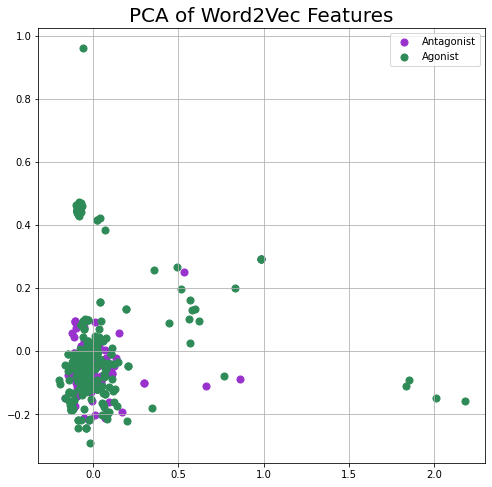

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of Word2Vec Features', fontsize = 20)
targets = [0,1]
colors = ['darkorchid', 'seagreen', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.iloc[:,2] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["Antagonist","Agonist"])
ax.grid()
plt.savefig("plot3.png")

In [ ]:
new_num_arr = np.load('dat2a.npy',allow_pickle=True)
#new_num_arr = np.load('data.npy',allow_pickle=True)
extra_data = np.load('dat3a.npy',allow_pickle=True)

with open("asarsa.json") as fp:
  extra_ss_data=json.load(fp)

binding site descriptors (useless tbh)

In [ ]:
with open("bind_site_feats.json") as fp:
  input=json.load(fp)
with open("bind_site_labels.json") as fp:
  output=json.load(fp)
extra_data=input

In [ ]:
extra_ss_data[0]

In [ ]:
for i in extra_data:
  print(len(i))

In [ ]:
te=[]
for num,i in enumerate(output):
  if num!=156:
    te.append(i)
output=te

In [ ]:
temp=[]

for i in new_num_arr:
  temp2=[]
  #temp2 = np.asarray(temp2)
  for j in i:
    for k in j:
      z=k[1:].astype(np.float32)
      #print(z)
      #temp2=np.array(np.append(temp2,np.asarray(z),axis=0))#.reshape((len(z),1)
      temp2.append(np.array(z))
  #print(temp2.shape)
  temp.append(np.array(temp2))
print(len(temp))
temp = np.asarray(temp)
print(temp.shape)
#output= output.astype(np.float32)

552
(552,)


In [ ]:
temp=[]
for num,i in enumerate(new_num_arr):
  temp2=[]
  #temp2 = np.asarray(temp2)
  if num>=156:
    num2=num-1
  else:
    num2=num
  if num!=156:
    for j in i:
      for k in j:
        z=k[1:].astype(np.float32)
        temp2.append(np.array(z))
    temp.append(np.array(temp2))
print(len(temp))
temp = np.asarray(temp)
print(temp.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


551
(551,)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
len(output)

551

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp, np.asarray(output), test_size=0.35)

In [ ]:
ragged_x_train = tf.ragged.constant(X_train)
ragged_x_test = tf.ragged.constant(X_test)

In [ ]:
ragged_x_train.shape

TensorShape([358, None, None])

In [ ]:
ragged_x_test.shape

TensorShape([193, None, None])

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from keras.layers import LSTM
tf.random.set_seed(1337)
np.random.seed(1337)
def model():
  keras_model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=[None,8000],ragged=True),
      #tf.keras.layers.Embedding(1454409, 27),
      tf.keras.layers.LSTM(16, return_sequences=True,dropout=0.2),#64
      tf.keras.layers.LSTM(16,dropout=0.2),#32
      tf.keras.layers.Dense(64),#32
      tf.keras.layers.Activation(tf.nn.relu),
      tf.keras.layers.Dense(1)
  ])

  keras_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])#(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
  keras_model.summary()
  return keras_model

In [ ]:
from sklearn.model_selection import StratifiedKFold
scores=[]
scs=[]
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=1337)
for train, test in kfold.split(temp, output):
  print(train)
  ragged_x_train = tf.ragged.constant(temp[train])
  ragged_x_test = tf.ragged.constant(temp[test])
  keras_model = model()
  keras_model.fit(ragged_x_train,output[train],batch_size=100,epochs=300)
  scor = keras_model.evaluate(ragged_x_test, output[test], verbose=0)
  scores.append(scor[1] * 100)
  pds=keras_model.predict(ragged_x_test)
  pds=rounder(pds)
  count=0
  for n,(i,j) in enumerate(zip(pds,output[test])):
    if i==j:
      count+=1
  print(count/len(output[test]))
  scs.append(count/len(output[test]))
(np.mean(scores), np.std(scores))

In [ ]:
import numpy as np
(np.mean(scores), np.std(scores))

In [ ]:
keras_model=model()
keras_model.fit(ragged_x_train,y_train,batch_size=100,epochs=150)

In [ ]:
count=0
for n,(i,j) in enumerate(zip(rounder(pds),y_test)):
  if i==j:
    count+=1
count/len(y_test)

0.7823834196891192

In [ ]:
def rounder(arr):
  rounded=[]
  for i in arr:
    if i<0.5:
      rounded.append(0)
    else:
      rounded.append(1)
  return rounded

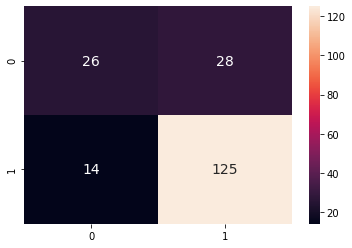

In [ ]:
from sklearn.metrics import confusion_matrix
np.round(pds)
matrix = confusion_matrix(y_test, rounder(pds))
sns.heatmap(matrix, annot=True, annot_kws={"size": 14}, fmt='g')
plt.show()

In [ ]:
data_with_seq=[]
for n,i in enumerate(temp):
  t=[]
  for j in i:
    t.append(j)
  t.append(inp[n])
  t=np.array(t)
  data_with_seq.append(t)
data_with_seq=np.array(data_with_seq)
print(data_with_seq.shape)

(552,)


In [ ]:
%load_ext tensorboard
from datetime import datetime
import tensorboard
tensorboard.__version__
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(extra_data, np.asarray(output), test_size=0.2)

NameError: ignored

In [ ]:
ragged_x_train = tf.ragged.constant(X_train)
ragged_x_test = tf.ragged.constant(X_test)

In [ ]:
keras_model = model()
keras_model.fit(ragged_x_train,y_train,batch_size=100,epochs=1)
scor = keras_model.evaluate(ragged_x_test, y_test, batch_size=100,callbacks=[tensorboard_callback])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, None, 16)          513088    
_________________________________________________________________
lstm_15 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                1088      
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 516,353
Trainable params: 516,353
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 220ms/step - loss: 0.8613 - accuracy: 0.2798


In [ ]:
scor = keras_model.predict(ragged_x_test)

In [ ]:
from keras_self_attention import SeqSelfAttention
from keras.layers import Bidirectional,LSTM,Dense,Activation
inps = Input(shape=[None,8000],ragged=True)

lstm = Bidirectional(LSTM(64,dropout=0.2, return_sequences=1))(inps)
attention_probs = Dense( 1800, activation='sigmoid', name='attention_probs')(lstm)
attention_mul = multiply([ lstm, attention_probs], name='attention_mul')
lstm2 = LSTM(32,dropout=0.2)(attention_mul)
dene = Dense(32)(lstm2)
acc=Activation(tf.nn.relu)(dene)
dene=Dense(1)(acc)
keras_model = Model(inputs=[inps], outputs=dene)
keras_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
keras_model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])



TypeError: ignored

In [ ]:
len(inp[0])

100

In [ ]:
import torch
import torch.nn as nn
class LSTM(nn.Module):
  def __init__(self, input_size=100, hidden_layer_size=100, output_size=1):
      super().__init__()
      self.hidden_layer_size = hidden_layer_size
      self.lstm = nn.LSTM(input_size, hidden_layer_size,batch_first=True)
      self.linear = nn.Linear(hidden_layer_size, output_size)
      self.hidden_cell = (torch.zeros(1,self.hidden_layer_size,self.hidden_layer_size),
                            torch.zeros(1,self.hidden_layer_size,self.hidden_layer_size))
      self.ReLU = nn.ReLU(output_size)
      self.Sigmoid = nn.Sigmoid()

  def forward(self, input_seq):
    lstm_out1, self.hidden_cell1 = self.lstm(input_seq, self.hidden_cell)
    prediction1 = self.linear(lstm_out1)
    x = self.Sigmoid(prediction1)
    return x

In [ ]:
for num,i in enumerate(new_num_arr):
  temp2=[]
  #temp2 = np.asarray(temp2)
  if num>=156:
    num2=num-1
  else:
    num2=num
  if num!=156:
    for j in i:
      for k in j:
        z=k[1:].astype(np.float32)
        #print(z)
        #temp2=np.array(np.append(temp2,np.asarray(z),axis=0))#.reshape((len(z),1)
        temp2.append(np.array(z))
    #print(temp2.shape)
    #for j in extra_data[num]:
    #  temp2.append(np.array(j))
    #temp2.append(extra_ss_data[2*num2])
    #temp2.append(extra_ss_data[(2*num2)+1])
    temp.append(np.array(temp2))
#output= output.astype(np.float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 7.8MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 1.2MB 13.0MB/s 
     |████████████████████████████████| 112kB 32.7MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 143kB 23.4MB/s 
     |████████████████████████████████| 481kB 21.4MB/s 
  Created wheel for alembic: filename=alembic-1.5.5-py2.py3-none-any.whl size=156597 sha256=2067e89c0d37b5864b4b686736e8fb75c7220c8d0f4c347ff823309f24c3a703
  Stored in directory: /root/.cache/pip/wheels/74/3f/61/7de6e3cef766d2680a5d81b1a388286e640f6a681eb589d643
  Created wheel for Mako: filename=Mako-1.1.4-py2.py3-none-any.whl size=75675 sha256=ee92f1e2982ae3ba568441b35e0604eb1f5c47048b1de8b0da23b8bcacf15f3b
  Stored in directory: /root/.cache/pip/wheels/ad/10/d3/aeb26e20d19045e2a68e5d3cbb57432e11b5d9c92c99f98d47
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=

In [ ]:
type(ragged_x_train),type(ragged_x_test),type(y_train),type(y_test)

(tensorflow.python.ops.ragged.ragged_tensor.RaggedTensor,
 tensorflow.python.ops.ragged.ragged_tensor.RaggedTensor,
 numpy.ndarray,
 numpy.ndarray)

In [ ]:
import keras

import optuna

# 1. Define an objective function to be maximized.
def objective(trial):
    model = Sequential()
    # 2. Suggest values of the hyperparameters using a trial object.
    model.add(tf.keras.layers.Input(shape=[None,8000],ragged=True))
    model.add(tf.keras.layers.LSTM(dropout=trial.suggest_float("dropout", 0.1, 0.5),units=trial.suggest_int("units", 2,128), return_sequences=True))
    model.add(tf.keras.layers.LSTM(dropout=trial.suggest_float("dropout", 0.1, 0.5),units=trial.suggest_int("units", 2,128)))
    model.add(tf.keras.layers.Dense(1, activation='softmax'))

    # We compile our model with a sampled learning rate.
    lr = trial.suggest_float('lr', 1e-5, 1e-1,log=True)
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=lr), metrics=['accuracy'])
    model.fit(ragged_x_train,y_train,shuffle=True,batch_size=50,epochs=100)
    print(model.summary())
    score = model.evaluate(ragged_x_test, y_test, verbose=0)
    return score[1]

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-03-05 10:15:09,586] A new study created in memory with name: no-name-02c7ba2a-11d6-43c6-b675-37ce67227652


Epoch 1/100
8/8 [==============================] - 17s 2s/step - loss: 0.8330 - accuracy: 0.7199
Epoch 2/100
8/8 [==============================] - 14s 2s/step - loss: 0.6012 - accuracy: 0.7007
Epoch 3/100
8/8 [==============================] - 14s 2s/step - loss: 0.5743 - accuracy: 0.7130
Epoch 4/100
8/8 [==============================] - 14s 2s/step - loss: 0.5470 - accuracy: 0.7272
Epoch 5/100
8/8 [==============================] - 14s 2s/step - loss: 0.4426 - accuracy: 0.7452
Epoch 6/100
8/8 [==============================] - 14s 2s/step - loss: 0.5299 - accuracy: 0.7091
Epoch 7/100
8/8 [==============================] - 13s 2s/step - loss: 0.4527 - accuracy: 0.7275
Epoch 8/100
8/8 [==============================] - 14s 2s/step - loss: 0.4563 - accuracy: 0.7538
Epoch 9/100
8/8 [==============================] - 14s 2s/step - loss: 0.4592 - accuracy: 0.7344
Epoch 10/100
8/8 [==============================] - 14s 2s/step - loss: 0.4672 - accuracy: 0.7148
Epoch 11/100
8/8 [===========

[I 2021-03-05 10:38:46,210] Trial 0 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.4348938291475265, 'units': 99, 'lr': 0.0065858323348970405}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 8s 589ms/step - loss: 0.6761 - accuracy: 0.7280
Epoch 2/100
8/8 [==============================] - 5s 579ms/step - loss: 0.6726 - accuracy: 0.7188
Epoch 3/100
8/8 [==============================] - 5s 595ms/step - loss: 0.6749 - accuracy: 0.7135
Epoch 4/100
8/8 [==============================] - 5s 602ms/step - loss: 0.6706 - accuracy: 0.7038
Epoch 5/100
8/8 [==============================] - 5s 587ms/step - loss: 0.6707 - accuracy: 0.7227
Epoch 6/100
8/8 [==============================] - 5s 618ms/step - loss: 0.6703 - accuracy: 0.7325
Epoch 7/100
8/8 [==============================] - 4s 539ms/step - loss: 0.6675 - accuracy: 0.7216
Epoch 8/100
8/8 [==============================] - 5s 644ms/step - loss: 0.6660 - accuracy: 0.7175
Epoch 9/100
8/8 [==============================] - 5s 578ms/step - loss: 0.6637 - accuracy: 0.7432
Epoch 10/100
8/8 [==============================] - 5s 578ms/step - loss: 0.6703 - accuracy: 0.7086
Epoch 11/

[I 2021-03-05 10:46:46,364] Trial 1 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.2210649859910904, 'units': 3, 'lr': 1.051388889485286e-05}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 18s 2s/step - loss: 0.7045 - accuracy: 0.7162
Epoch 2/100
8/8 [==============================] - 15s 2s/step - loss: 0.6201 - accuracy: 0.7119
Epoch 3/100
8/8 [==============================] - 15s 2s/step - loss: 0.5419 - accuracy: 0.7154
Epoch 4/100
8/8 [==============================] - 15s 2s/step - loss: 0.5468 - accuracy: 0.7073
Epoch 5/100
8/8 [==============================] - 15s 2s/step - loss: 0.5058 - accuracy: 0.6782
Epoch 6/100
8/8 [==============================] - 15s 2s/step - loss: 0.3980 - accuracy: 0.7272
Epoch 7/100
8/8 [==============================] - 15s 2s/step - loss: 0.4061 - accuracy: 0.7150
Epoch 8/100
8/8 [==============================] - 15s 2s/step - loss: 0.3478 - accuracy: 0.7363
Epoch 9/100
8/8 [==============================] - 16s 2s/step - loss: 0.2998 - accuracy: 0.7314
Epoch 10/100
8/8 [==============================] - 15s 2s/step - loss: 0.3757 - accuracy: 0.7131
Epoch 11/100
8/8 [===========

[I 2021-03-05 11:11:44,356] Trial 2 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.3536172502031061, 'units': 105, 'lr': 0.0023596186923326096}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 19s 2s/step - loss: 1.4188 - accuracy: 0.7111
Epoch 2/100
8/8 [==============================] - 17s 2s/step - loss: 0.6450 - accuracy: 0.7148
Epoch 3/100
8/8 [==============================] - 16s 2s/step - loss: 0.5990 - accuracy: 0.7042
Epoch 4/100
8/8 [==============================] - 16s 2s/step - loss: 0.6236 - accuracy: 0.7170
Epoch 5/100
8/8 [==============================] - 16s 2s/step - loss: 0.6309 - accuracy: 0.7077
Epoch 6/100
8/8 [==============================] - 17s 2s/step - loss: 0.6140 - accuracy: 0.7250
Epoch 7/100
8/8 [==============================] - 16s 2s/step - loss: 0.5961 - accuracy: 0.7037
Epoch 8/100
8/8 [==============================] - 15s 2s/step - loss: 0.6135 - accuracy: 0.6921
Epoch 9/100
8/8 [==============================] - 16s 2s/step - loss: 0.5959 - accuracy: 0.6879
Epoch 10/100
8/8 [==============================] - 14s 2s/step - loss: 0.5996 - accuracy: 0.7135
Epoch 11/100
8/8 [===========

[I 2021-03-05 11:38:31,191] Trial 3 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.39464712931251167, 'units': 116, 'lr': 0.023733300126942455}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 14s 1s/step - loss: 1.1025 - accuracy: 0.6928
Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 0.5997 - accuracy: 0.7191
Epoch 3/100
8/8 [==============================] - 10s 1s/step - loss: 0.6042 - accuracy: 0.7332
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 0.6264 - accuracy: 0.7089
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 0.5805 - accuracy: 0.7401
Epoch 6/100
8/8 [==============================] - 9s 1s/step - loss: 0.6011 - accuracy: 0.6924
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 0.5730 - accuracy: 0.7367
Epoch 8/100
8/8 [==============================] - 11s 1s/step - loss: 0.5732 - accuracy: 0.7105
Epoch 9/100
8/8 [==============================] - 10s 1s/step - loss: 0.5775 - accuracy: 0.7056
Epoch 10/100
8/8 [==============================] - 11s 1s/step - loss: 0.7156 - accuracy: 0.6903
Epoch 11/100
8/8 [=============

[I 2021-03-05 11:55:39,085] Trial 4 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.4798866795178178, 'units': 64, 'lr': 0.04523726082583492}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 21s 2s/step - loss: 1.8674 - accuracy: 0.7032
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 0.6985 - accuracy: 0.7271
Epoch 3/100
8/8 [==============================] - 17s 2s/step - loss: 0.6036 - accuracy: 0.7248
Epoch 4/100
8/8 [==============================] - 17s 2s/step - loss: 0.6251 - accuracy: 0.7228
Epoch 5/100
8/8 [==============================] - 18s 2s/step - loss: 0.6903 - accuracy: 0.6931
Epoch 6/100
8/8 [==============================] - 18s 2s/step - loss: 0.6218 - accuracy: 0.7084
Epoch 7/100
8/8 [==============================] - 16s 2s/step - loss: 0.6476 - accuracy: 0.7104
Epoch 8/100
8/8 [==============================] - 17s 2s/step - loss: 0.6862 - accuracy: 0.7336
Epoch 9/100
8/8 [==============================] - 17s 2s/step - loss: 0.5759 - accuracy: 0.7294
Epoch 10/100
8/8 [==============================] - 17s 2s/step - loss: 0.5874 - accuracy: 0.7244
Epoch 11/100
8/8 [===========

[I 2021-03-05 12:23:50,132] Trial 5 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.48816617562673337, 'units': 121, 'lr': 0.04125027128411712}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 22s 2s/step - loss: 0.6537 - accuracy: 0.7234
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 0.6178 - accuracy: 0.7207
Epoch 3/100
8/8 [==============================] - 19s 2s/step - loss: 0.5969 - accuracy: 0.7227
Epoch 4/100
8/8 [==============================] - 17s 2s/step - loss: 0.5980 - accuracy: 0.7138
Epoch 5/100
8/8 [==============================] - 18s 2s/step - loss: 0.5890 - accuracy: 0.7228
Epoch 6/100
8/8 [==============================] - 17s 2s/step - loss: 0.6139 - accuracy: 0.6906
Epoch 7/100
8/8 [==============================] - 16s 2s/step - loss: 0.5769 - accuracy: 0.7242
Epoch 8/100
8/8 [==============================] - 18s 2s/step - loss: 0.5866 - accuracy: 0.7169
Epoch 9/100
8/8 [==============================] - 17s 2s/step - loss: 0.5940 - accuracy: 0.6933
Epoch 10/100
8/8 [==============================] - 18s 2s/step - loss: 0.5650 - accuracy: 0.7403
Epoch 11/100
8/8 [===========

[I 2021-03-05 12:52:47,797] Trial 6 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.46175097242435115, 'units': 128, 'lr': 5.503268206118775e-05}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 12s 1s/step - loss: 0.6882 - accuracy: 0.7116
Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 0.6384 - accuracy: 0.6768
Epoch 3/100
8/8 [==============================] - 8s 1s/step - loss: 0.6054 - accuracy: 0.7184
Epoch 4/100
8/8 [==============================] - 9s 1s/step - loss: 0.5842 - accuracy: 0.7242
Epoch 5/100
8/8 [==============================] - 8s 984ms/step - loss: 0.5868 - accuracy: 0.7127
Epoch 6/100
8/8 [==============================] - 8s 994ms/step - loss: 0.6081 - accuracy: 0.6941
Epoch 7/100
8/8 [==============================] - 8s 1000ms/step - loss: 0.5792 - accuracy: 0.7257
Epoch 8/100
8/8 [==============================] - 9s 1s/step - loss: 0.5791 - accuracy: 0.7153
Epoch 9/100
8/8 [==============================] - 8s 1s/step - loss: 0.6085 - accuracy: 0.6900
Epoch 10/100
8/8 [==============================] - 8s 1s/step - loss: 0.5602 - accuracy: 0.7343
Epoch 11/100
8/8 [==========

[I 2021-03-05 13:06:41,119] Trial 7 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.25114432073438797, 'units': 42, 'lr': 0.00010930017665486733}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 18s 2s/step - loss: 0.6557 - accuracy: 0.7062
Epoch 2/100
8/8 [==============================] - 15s 2s/step - loss: 0.5833 - accuracy: 0.7180
Epoch 3/100
8/8 [==============================] - 14s 2s/step - loss: 0.4678 - accuracy: 0.7268
Epoch 4/100
8/8 [==============================] - 14s 2s/step - loss: 0.3910 - accuracy: 0.7430
Epoch 5/100
8/8 [==============================] - 14s 2s/step - loss: 0.3725 - accuracy: 0.7007
Epoch 6/100
8/8 [==============================] - 14s 2s/step - loss: 0.3193 - accuracy: 0.7408
Epoch 7/100
8/8 [==============================] - 14s 2s/step - loss: 0.3353 - accuracy: 0.6917
Epoch 8/100
8/8 [==============================] - 14s 2s/step - loss: 0.3085 - accuracy: 0.7241
Epoch 9/100
8/8 [==============================] - 15s 2s/step - loss: 0.3181 - accuracy: 0.6942
Epoch 10/100
8/8 [==============================] - 14s 2s/step - loss: 0.3230 - accuracy: 0.7000
Epoch 11/100
8/8 [===========

[I 2021-03-05 13:30:40,886] Trial 8 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.31419366989971953, 'units': 102, 'lr': 0.0009648158706090487}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 15s 1s/step - loss: 0.6413 - accuracy: 0.7135
Epoch 2/100
8/8 [==============================] - 9s 1s/step - loss: 0.5848 - accuracy: 0.7229
Epoch 3/100
8/8 [==============================] - 9s 1s/step - loss: 0.5747 - accuracy: 0.7212
Epoch 4/100
8/8 [==============================] - 9s 1s/step - loss: 0.5716 - accuracy: 0.7054
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 0.4571 - accuracy: 0.7422
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 0.4373 - accuracy: 0.7142
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 0.3858 - accuracy: 0.7041
Epoch 8/100
8/8 [==============================] - 9s 1s/step - loss: 0.3403 - accuracy: 0.7310
Epoch 9/100
8/8 [==============================] - 10s 1s/step - loss: 0.3262 - accuracy: 0.7312
Epoch 10/100
8/8 [==============================] - 9s 1s/step - loss: 0.2972 - accuracy: 0.7068
Epoch 11/100
8/8 [================

[I 2021-03-05 13:46:01,133] Trial 9 finished with value: 0.7150259017944336 and parameters: {'dropout': 0.2722218597770443, 'units': 53, 'lr': 0.0004802884165322298}. Best is trial 0 with value: 0.7150259017944336.


Epoch 1/100
8/8 [==============================] - 16s 2s/step - loss: 0.7654 - accuracy: 0.7049
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 0.6005 - accuracy: 0.7242
Epoch 3/100
8/8 [==============================] - 13s 2s/step - loss: 0.5852 - accuracy: 0.7317
Epoch 4/100
8/8 [==============================] - 12s 2s/step - loss: 0.5116 - accuracy: 0.7469
Epoch 5/100
8/8 [==============================] - 11s 1s/step - loss: 0.4706 - accuracy: 0.7299
Epoch 6/100
8/8 [==============================] - 13s 2s/step - loss: 0.4391 - accuracy: 0.7268
Epoch 7/100
8/8 [==============================] - 12s 1s/step - loss: 0.4047 - accuracy: 0.7325
Epoch 8/100
8/8 [==============================] - 13s 2s/step - loss: 0.4202 - accuracy: 0.7132
Epoch 9/100
8/8 [==============================] - 13s 2s/step - loss: 0.3927 - accuracy: 0.7224
Epoch 10/100
8/8 [==============================] - 12s 1s/step - loss: 0.3868 - accuracy: 0.7083
Epoch 11/100
8/8 [===========

KeyboardInterrupt: ignored

In [ ]:
pip install -U keras-tuner

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(tf.keras.layers.LSTM(units=hp.Int('units_' + str(i), 2, 128, 4),dropout=0.2))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='my_dir',project_name='helloworld')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 128, 'step': 4, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 128, 'step': 4, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(ragged_x_train, y_train,epochs=5,validation_data=(ragged_x_test, y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
num_layers        |9                 |?                 
units_0           |82                |?                 
units_1           |30                |?                 
learning_rate     |0.0001            |?                 

Epoch 1/5


TypeError: ignored

visualize


In [ ]:
!pip install conx

In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2MB 22kB/s 
     |████████████████████████████████| 460kB 47.9MB/s 
     |████████████████████████████████| 3.0MB 43.6MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [ ]:
import conx as cx
tf.keras.layers.Input(shape=[None,8000],ragged=True),
      #tf.keras.layers.Embedding(1454409, 27),
      tf.keras.layers.LSTM(16, return_sequences=True,dropout=0.2),#64
      tf.keras.layers.LSTM(16,dropout=0.2),#32
      tf.keras.layers.Dense(64),#32
      tf.keras.layers.Activation(tf.nn.relu),
      tf.keras.layers.Dense(1)

ConX, version 3.7.10


In [ ]:
import numpy as np
net4 = cx.Network("Model Architecture")
net4.add(cx.Layer("input", shape=[None,8000],ragged=True))
net4.add(cx.LSTMLayer("lstm-1", 95, return_sequences=True)) 
net4.add(cx.LSTMLayer("lstm-2", 20)) 
net4.add(cx.Layer("Dense", 1))
net4.add(cx.Layer("Threshold", 1))
net4.connect()
net4.compile(error="mse", optimizer="adam")

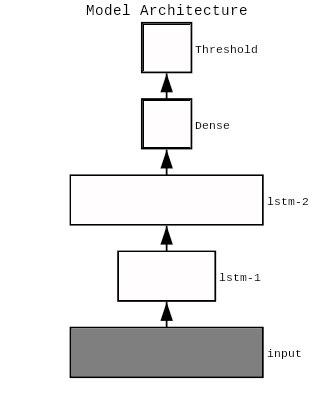

In [ ]:
net4.picture(format="image")